## Problem Statement - Loan Prediction

Dream Housing Finance company deals in all home loans. They have presence across all urban,
semi urban and rural areas. Customer first apply for home loan after that company validates
the customer eligibility for loan. Company wants to automate the loan eligibility process (real
time) based on customer detail provided while filling online application form. These details are
Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit
History and others. To automate this process, they have given a problem to identify the
customers segments, those are eligible for loan amount so that they can specifically target
these customers.


Hypothesis of getting loan approved

* Applicants with high income should have more chances of loan approval.
* Applicants who have repaid their previous debts should have higher chances of loan
approval.
* Loan approval should also depend on the loan amount. If the loan amount is less, chances
of loan approval should be high.
* Lesser the amount to be paid monthly to repay the loan, higher the chances of loan
approval.


## Loading Packages

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [75]:
train = pd.read_csv("./train_data.csv")
test = pd.read_csv("./test_data.csv")

In [76]:
#making a copy for not losing the original datasets

train_original = train.copy()
test_original = test.copy()

## Understanding the Data

In [77]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [78]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [79]:
#contains three types of datatypes
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [80]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [81]:
train.shape , test.shape

((614, 13), (367, 12))

## Variate Analysis on dataset

### Univariate Analysis

In [82]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [83]:
# Normalize returns the proportions of the frequencies
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<AxesSubplot:>

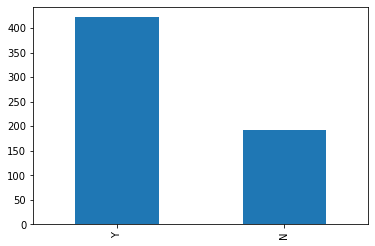

In [84]:
train['Loan_Status'].value_counts().plot.bar()

From the above plot, where 69% of loan was approved

## Lets visualize the each variable separately

contains variables such as 

* Categorical - Gender , Married,self_Employed, credit_History, Loan_status
* Ordinal  - Dependents , Education, Property_area
* Numerical  - ApplicantIncome,Coapplicantincome,LoanAmount,Loan_Amount_Term                Credit_History.

<AxesSubplot:title={'center':'Credit History'}>

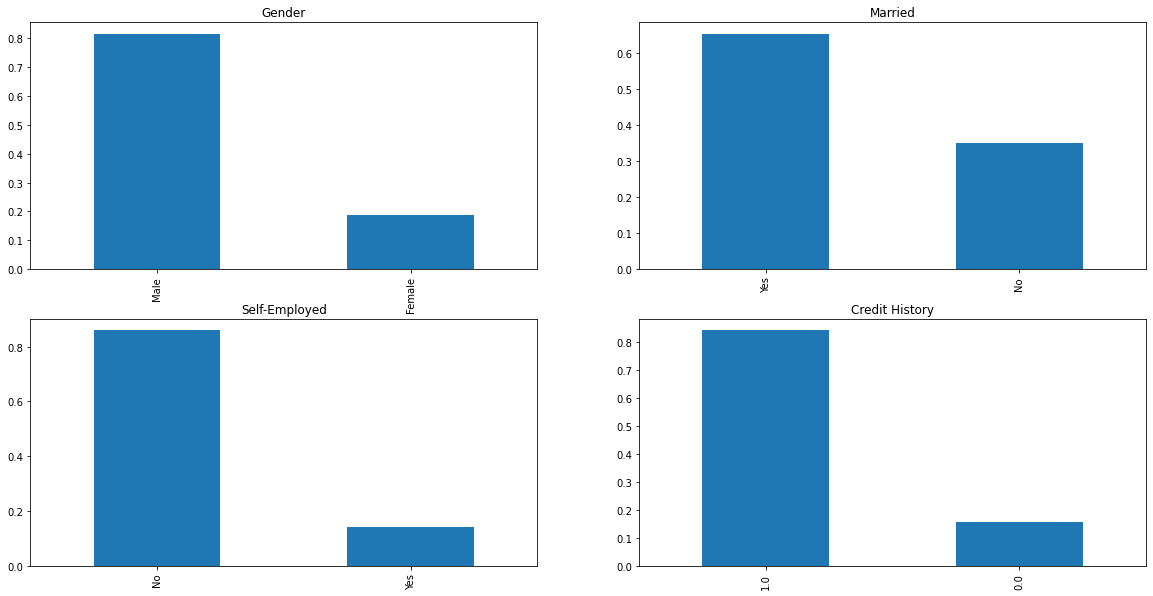

In [85]:
# Independent variable - categorical

plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = 'Gender')

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title = 'Self-Employed')

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit History')

From the plots, the inferred informations are 

* 80% of applicants are male
* 85% of applicants are married
* 15% of applicants are self-employed
* 85% of applicants repayed their debts

<AxesSubplot:title={'center':'Property Area'}>

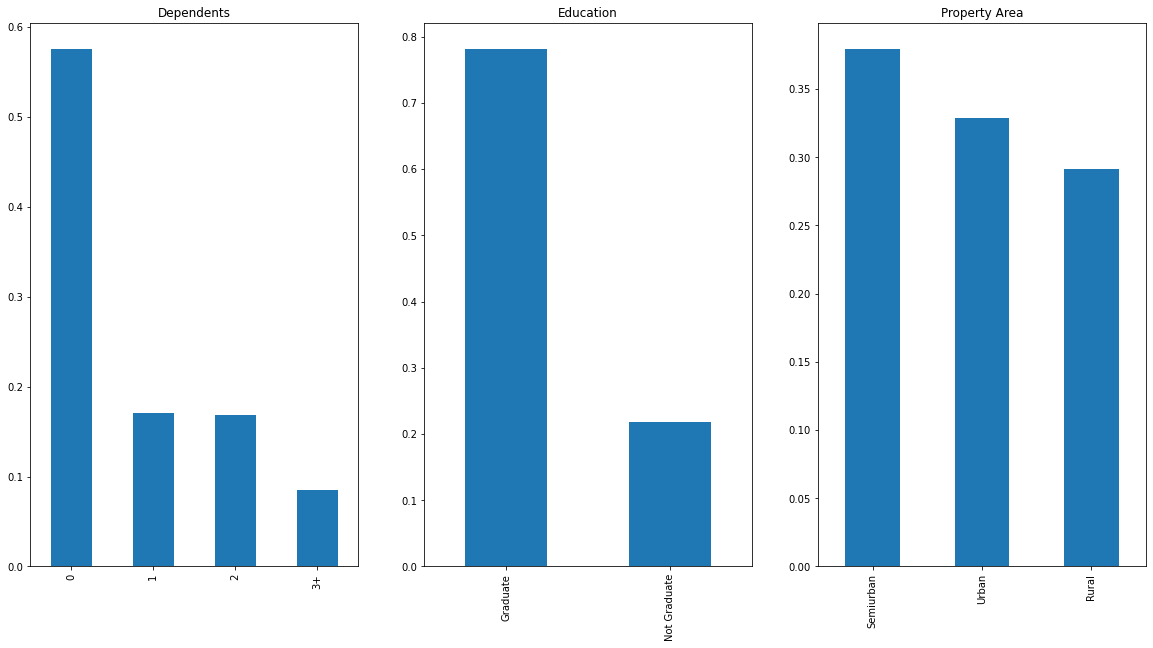

In [86]:
# independent variable - ordinal

plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize = (20,10),title = 'Dependents')

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property Area')


From the plots, the inferred informations are 

* Highest number of applicants doesn't have dependants
* 79% of applicants are Graduate
* Most of applicants are from semi-urban area

<AxesSubplot:>

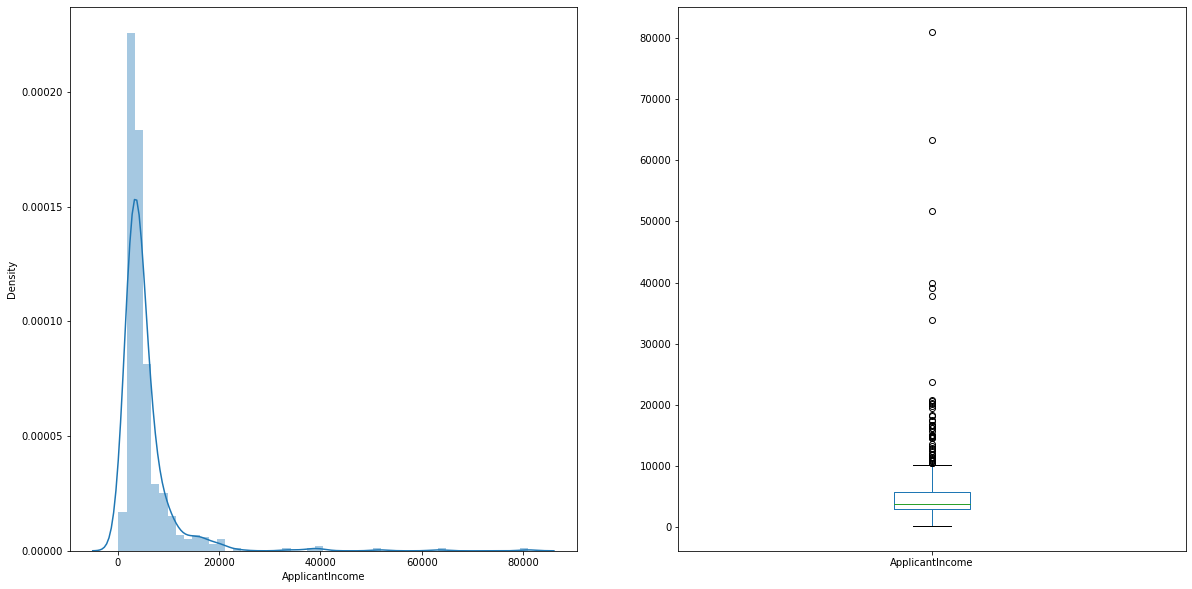

In [87]:
# Independent variable - Numerical

plt.figure(1)
plt.subplot(121) 
sns.distplot(train['ApplicantIncome'])

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize =(20,10))



The plot shows that the presence of lot of outliers in the data, and the income varies on profession and education.let us segregate them by education

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

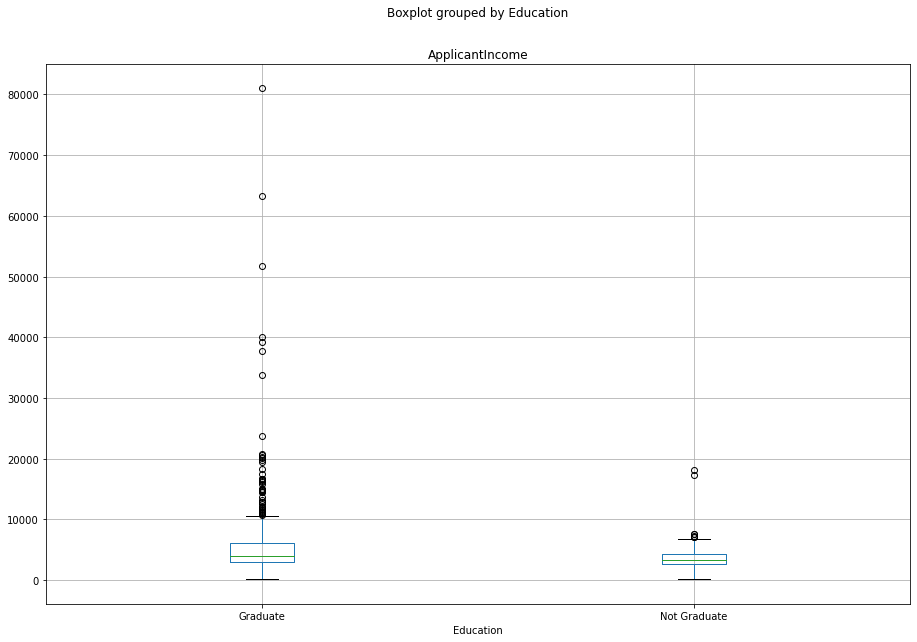

In [88]:
train.boxplot(column='ApplicantIncome', by = 'Education', figsize = (15,10))

The highest number of outliers are apperaing with highest number of graduates with very high income

<AxesSubplot:>

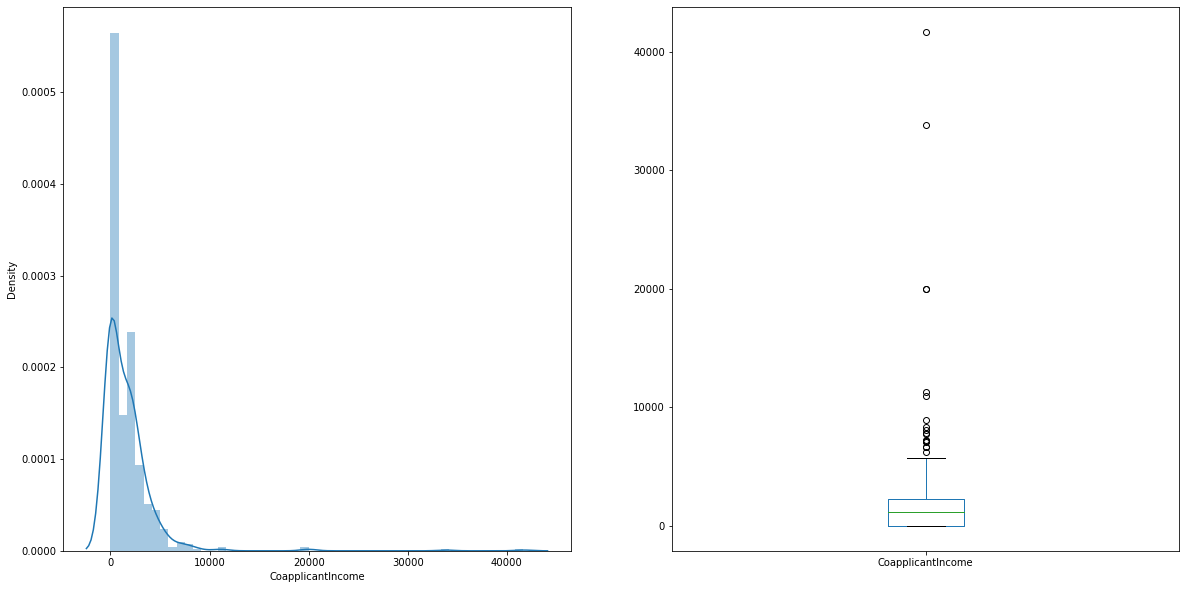

In [89]:
#coapplicant income
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize =(20,10))


Where the majority number of coapplicant's income ranges from 0 to 5000, also lot of outliers are present and are not normally distributed

<AxesSubplot:>

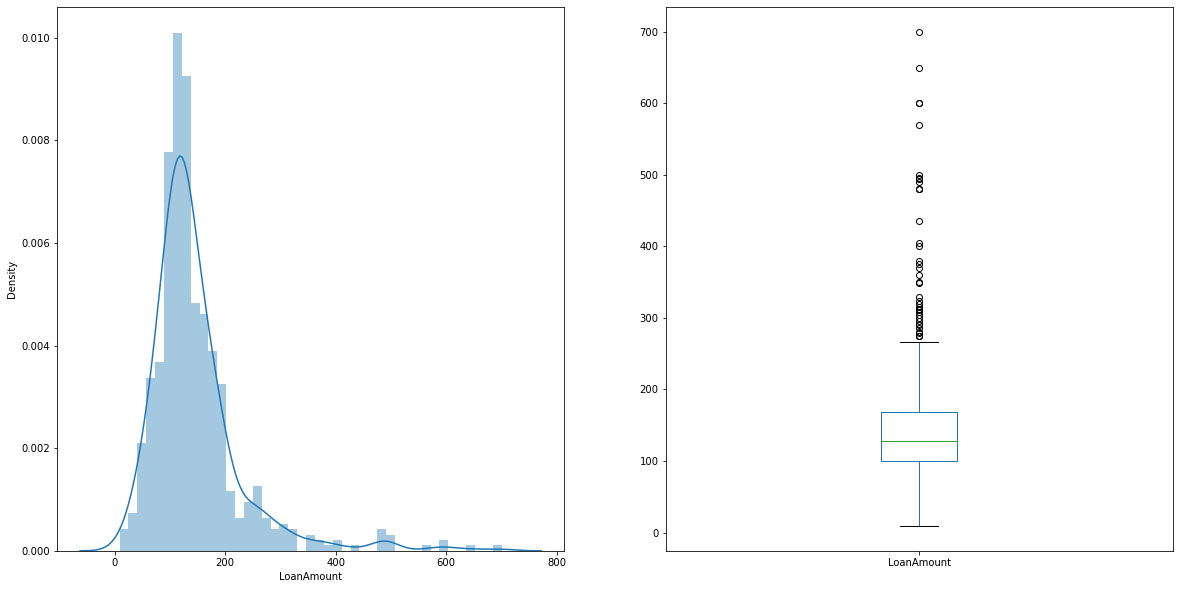

In [90]:
#Loan Amount
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['LoanAmount'])

plt.subplot(122)
train['LoanAmount'].plot.box(figsize =(20,10))

Highest number of outliers are present and are fairly distributed

### Bivariate Analysis

#### Categorical values vs Target Variable
now finding the relationship between target variable and catgeorical independent variables.

<AxesSubplot:xlabel='Gender'>

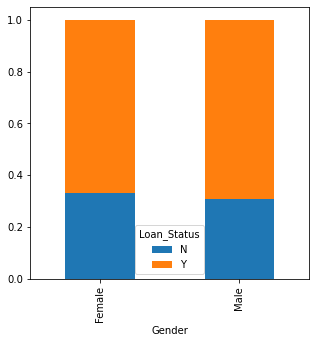

In [91]:
Gender = pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis =0).plot(kind = "bar",stacked=True,figsize=(5,5))

Can be inferred that, the proportion of loan approval is almost equal on both gender

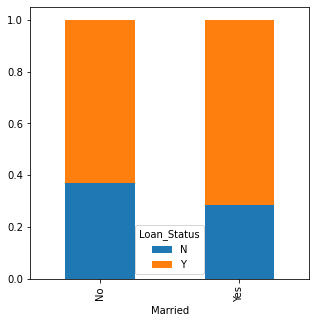

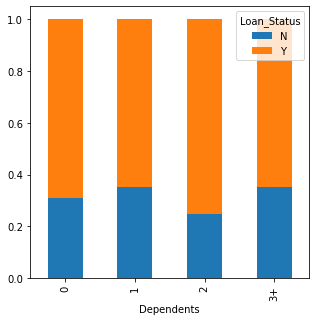

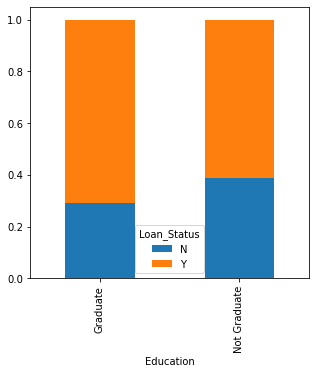

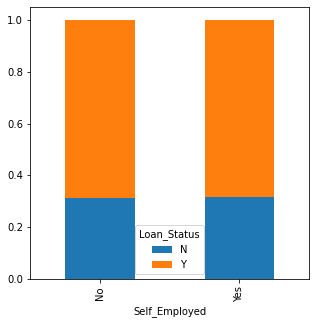

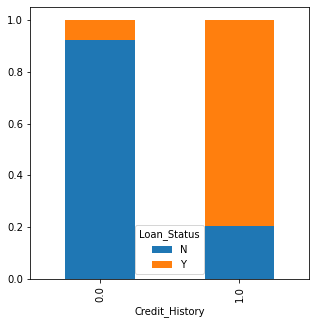

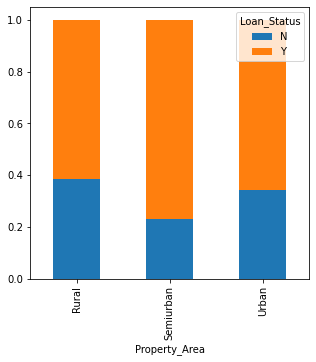

In [92]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis =0).plot(kind = "bar",stacked=True,figsize=(5,5))

Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float),axis =0).plot(kind = "bar",stacked=True,figsize=(5,5))

Education = pd.crosstab(train['Education'],train['Loan_Status'])
Education.div(Education.sum(1).astype(float),axis =0).plot(kind = "bar",stacked=True,figsize=(5,5))

Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float),axis =0).plot(kind = "bar",stacked=True,figsize=(5,5))

Credit_History = pd.crosstab(train['Credit_History'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis =0).plot(kind = "bar",stacked=True,figsize=(5,5))

Property_Area = pd.crosstab(train['Property_Area'],train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float),axis =0).plot(kind = "bar",stacked=True,figsize=(5,5))

plt.show()

### Correlation between all numerical variables 

In [93]:
# using heat map to visualize the correlation

matrix = train.corr()

In [94]:
matrix

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


<AxesSubplot:>

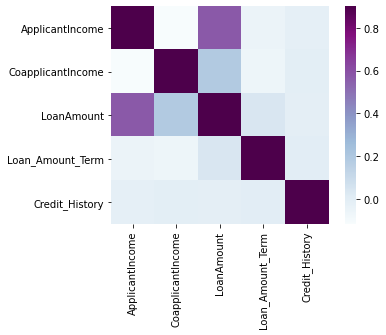

In [95]:
sns.heatmap(matrix , vmax = .9 , square = True,  cmap = "BuPu")

from the heatmap can aobserve that the most correlated variables are Applicantincome-Loan amount, LoanAmount-CoapplicantIncome

## Handling Missing Values and Outliers

In [96]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Where the missing valuse can be handled by replacing with

* numerical values : imputation using mean or median
* Categorical values : imputation using mode

In [97]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [98]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [99]:
#In loan_amount_term the value 360 is repeating the most.so will replace using model instead of median
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [100]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

 `Outliers:`
 > Where the outliers can be handled by using log transformation, the best method to remove the skewness

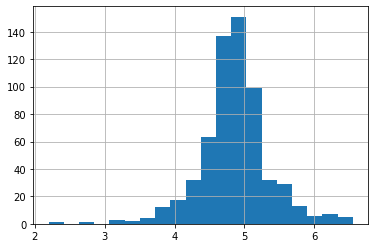

In [101]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

test['LoanAmount_test'] = np.log(test['LoanAmount'])

In [102]:
train = train.drop('Loan_ID',axis=1)
test = test.drop('Loan_ID',axis=1)

### Separate dependent and Independent variable

In [103]:
X = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [104]:
# converting categorical values into numerical values using dummies

X = pd.get_dummies(X)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

### Splitting the Dataset

In [129]:
from sklearn.model_selection import train_test_split

X_train , x_t , y_train, y_t = train_test_split(X,y,test_size=0.2)

###  Training using various algorithms

In [130]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [131]:
models=[]
models.append(("Logistic Regression",LogisticRegression()))
models.append(("Decision Tree",DecisionTreeClassifier()))
models.append(("Linear Discriminant Analysis",LinearDiscriminantAnalysis()))
models.append(("Random Forest",RandomForestClassifier()))
models.append(("Support Vector Classifier",SVC()))
models.append(("K- Neirest Neighbour",KNeighborsClassifier()))
models.append(("Naive Bayes",GaussianNB()))

In [132]:
scoring='accuracy'

In [133]:
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
result=[]
names=[]

In [134]:
for name,model in models:
    kfold=KFold(n_splits=10,random_state=0)
    cv_result=cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    result.append(cv_result)
    names.append(name)
    
    #printing the model
    print(model)
    
    #printing the mean of all 10 validation score
    print("%s %f" % (name,cv_result.mean()))

LogisticRegression()
Logistic Regression 0.808612
DecisionTreeClassifier()
Decision Tree 0.718857
LinearDiscriminantAnalysis()
Linear Discriminant Analysis 0.808571
RandomForestClassifier()
Random Forest 0.796367
SVC()
Support Vector Classifier 0.692531
KNeighborsClassifier()
K- Neirest Neighbour 0.655837
GaussianNB()
Naive Bayes 0.802449


In [135]:
#here choosing the logistic regression model
lr_model = LogisticRegression()

In [136]:
lr_model.fit(X_train,y_train)

LogisticRegression()

## Finding accuracy on Training Data

In [137]:
train_predictions = lr_model.predict(X_train)

In [138]:
from sklearn.metrics import accuracy_score

In [139]:
train_predictions_accuracy = accuracy_score(y_train,train_predictions)

In [140]:
train_predictions_accuracy

0.8085539714867617

## Predictions on Test data

In [141]:
prediction = lr_model.predict(x_t)

In [142]:
test_accuracy_score = accuracy_score(y_t,prediction)

In [143]:
test_accuracy_score

0.8130081300813008

## Saving the model

In [144]:
import pickle

In [148]:
# open a file, where you want to store the data
file = open('Bank_Loan_Prediction_model.pkl','wb')

# dump information to that file
pickle.dump(lr_model,file)

## Loading the model

In [149]:
load_model = pickle.load(open('Bank_Loan_Prediction_model.pkl','rb'))

In [150]:
load_model

LogisticRegression()